In [1]:
import pandas as pd
import seaborn as sns
import glob
from numpy import genfromtxt
from sklearn.metrics import f1_score
from matplotlib import pyplot as plt
import numpy as np
# https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html

/data/hoan/mybin/miniconda3/envs/py36/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# data_dir = glob.glob("/data/hoan/amromics/prediction/output/PanPred/*")
data_dir = glob.glob("/data/hoan/amromics/prediction/output/predPantaPanPred/*")

In [3]:
data_dir[:2]

['/data/hoan/amromics/prediction/output/predPantaPanPred/Ecoli1936_CTZ_run_0_panta_test_true_labels.csv',
 '/data/hoan/amromics/prediction/output/predPantaPanPred/Ecoli1936_CTZ_run_0_panta_SVM_labels.csv']

In [4]:
# colnames(df) <- c('Method', 'MLAlg',  'Data', 'Run', 'F1_score')

In [6]:
dataset = []; run = []; method = []; MlAlg = []; F1score = []; AMR = []
for idx in range(len(data_dir)):
    info = data_dir[idx].split('/')[-1].split('_')
    if info[5] != 'test': 
        dataset.append(info[0]+'_'+info[1]);
        AMR.append(info[1])
        run.append(info[3])
        # method.append(info[4]+'_'+info[5])
        method.append(info[4])
        MlAlg.append(info[5])
        true_labels_path = '/data/hoan/amromics/prediction/output/predPantaPanPred/' + dataset[-1] + '_run_'+run[-1]+'_panta_test_true_labels.csv'
        y_true = genfromtxt(true_labels_path, delimiter=',').astype(int)
        y_predict = genfromtxt(data_dir[idx], delimiter=',').astype(int)
        F1score.append(f1_score(y_predict, y_true, average='macro'))

In [7]:
df = pd.DataFrame({'Dataset': dataset, 'AMR': AMR, 'Run': run, 'Method':method, 'ML': MlAlg, 'F1_score': F1score})

In [8]:
df.head()

,Dataset,AMR,Run,Method,ML,F1_score
0,Ecoli1936_CTZ,CTZ,0,panta,SVM,0.734456
1,Ecoli1936_CTZ,CTZ,0,panta,DecisionTree,0.734456
2,Ecoli1936_CTZ,CTZ,0,panta,RandomForest,0.482323
3,Ecoli1936_CTZ,CTZ,0,panta,Adaboost,0.482323
4,Ecoli1936_CTZ,CTZ,0,panta,GBDT,0.838782


In [9]:
amr_list = np.unique(df['AMR'])
ML_list = np.unique(df['ML'])

In [10]:
amr_list

array(['AMC', 'AMP', 'AMX', 'CET', 'CIP', 'CTX', 'CTZ', 'CXM', 'GEN',
       'TBM', 'TMP', 'TZP'], dtype=object)

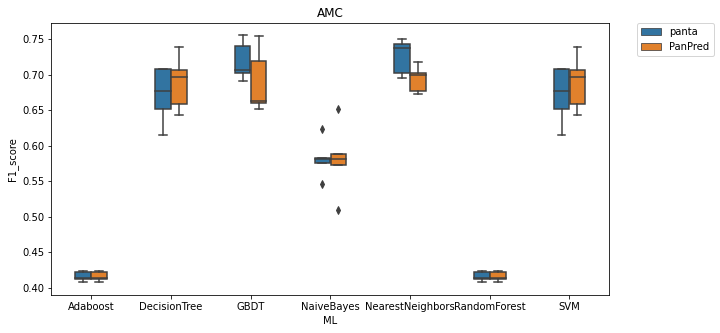

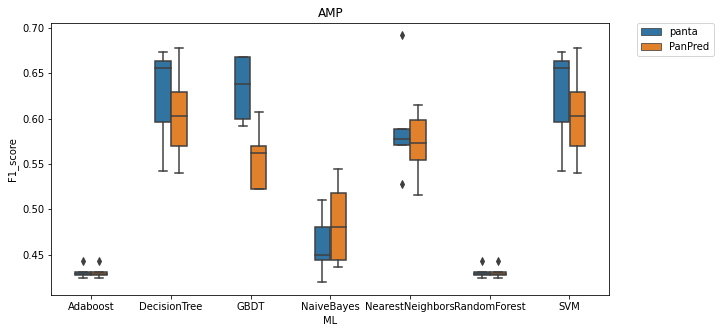

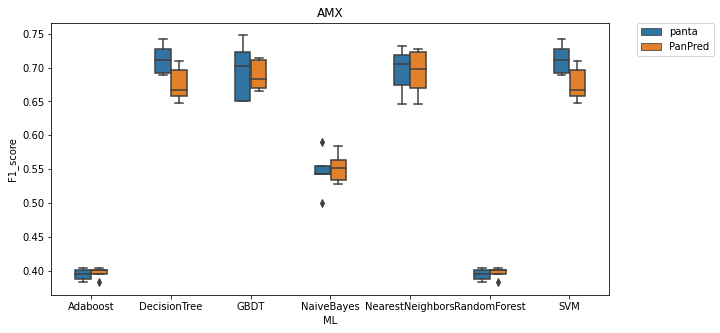

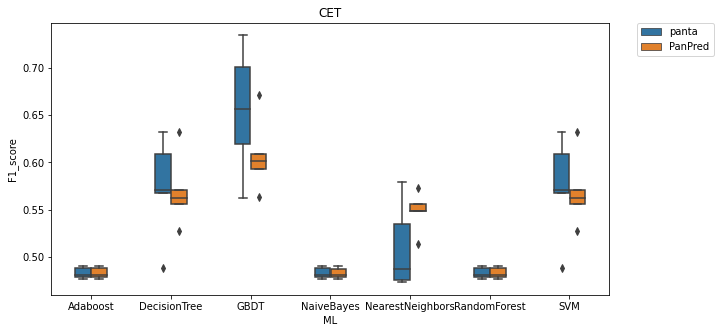

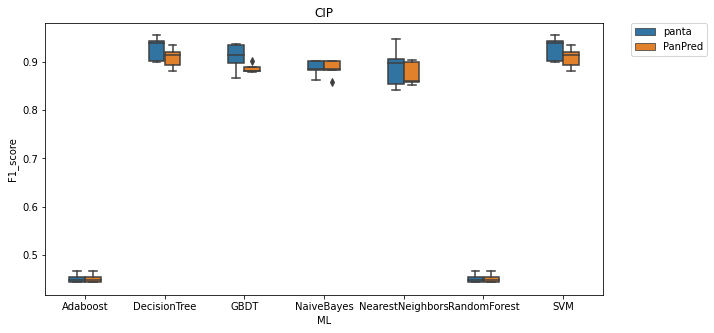

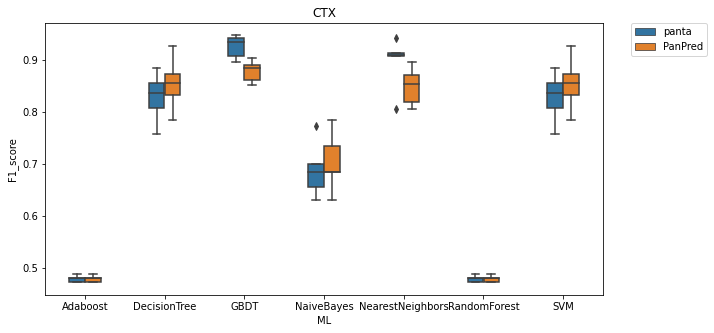

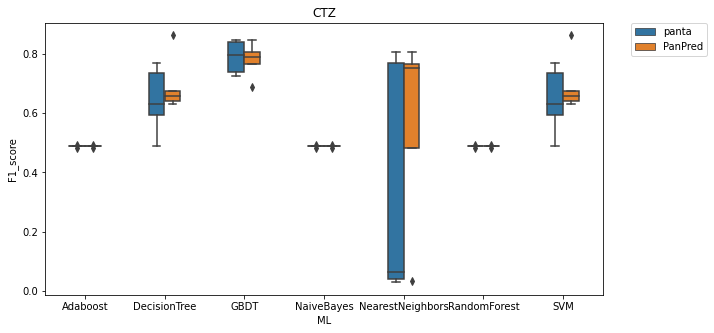

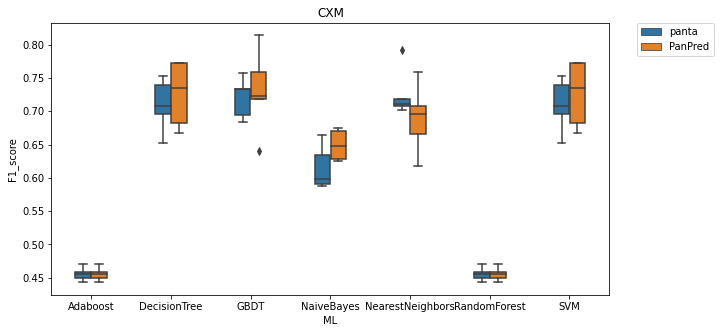

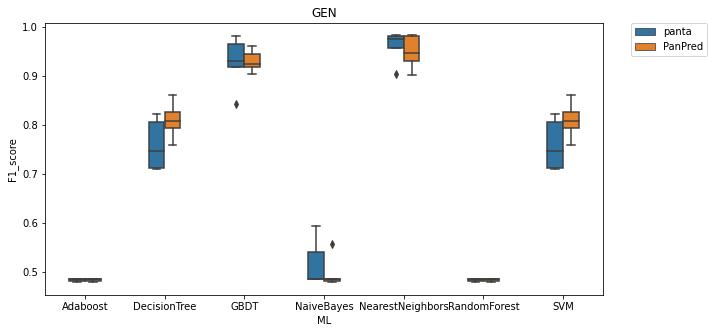

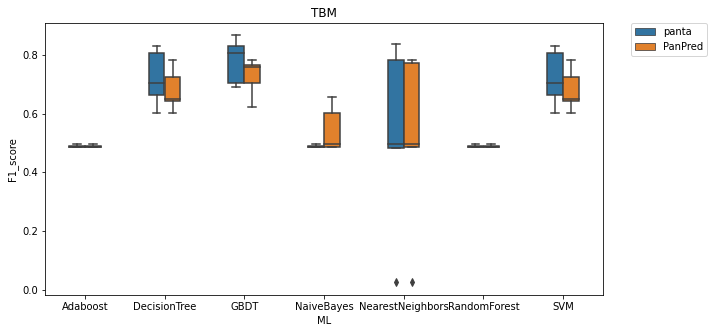

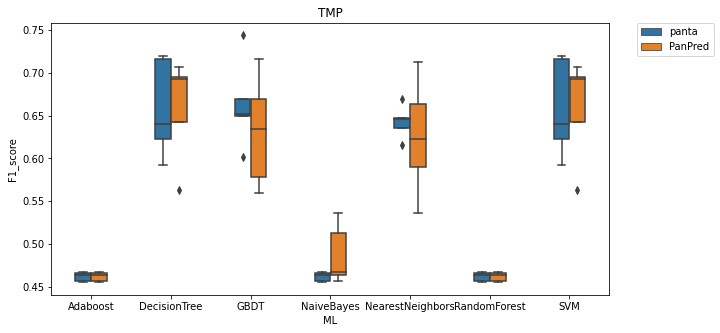

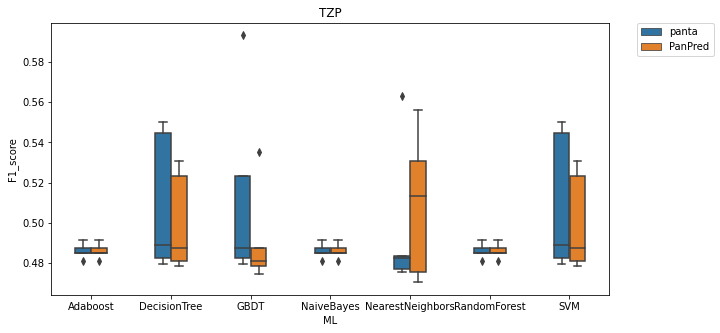

In [11]:
for amr in amr_list:
    df_subset = df[df["AMR"] == amr]
    # create grouped boxplot 
    plt.figure(figsize=(10,5))
    sns.boxplot(x = df_subset['ML'],
                y = df_subset['F1_score'],
                hue = df_subset['Method'], width=0.4, order = ML_list).set(title=amr)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [12]:
# plt.figure(figsize=(12,6))
# g = sns.FacetGrid(df, col="AMR", hue="Method")
# g.map(sns.barplot, "Dataset", "F1_score")
# g.add_legend()